In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ========== 人工构造数据集 ==========

num_inputs = 2
num_examples = 1000

n_data = torch.ones(num_examples, 2) #正负样本各50个，维度都是2
x1 = torch.normal(2 * n_data, 1) #负样本特征 shape=(50, 2)
y1 = torch.zeros(num_examples) # 标签：类型0（代表负例） shape=(50, 1)
x2 = torch.normal(-2 * n_data, 1) #正样本特征 shape=(50, 2)
y2 = torch.ones(num_examples) #标签：类型1（代表正例） shape=(50, 1)

x = torch.cat((x1, x2), 0).type(torch.FloatTensor)
y = torch.cat((y1, y2), 0).type(torch.FloatTensor)

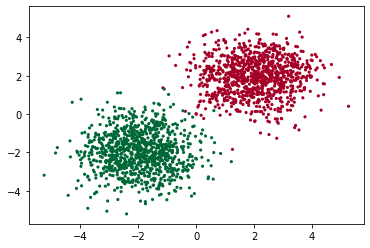

In [3]:
# ========== 数据集可视化 ==========

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=10, lw=0,cmap='RdYlGn')
plt.show()

In [4]:
# ========== 初始化参数 ==========

#初始化w和b用于更新
w = torch.randn(2, 1, requires_grad = True)
b = torch.randn(1, 1, requires_grad = True)

#设置学习率和迭代次数
lr = 0.03
num_epochs = 10  

In [5]:
# ========== 梯度更新 ==========

#Los = torch.nn.BCEWithLogitsLoss()

cost = [] #loss的集合
acc_re = [] #acc的集合
for epoch in range(num_epochs):
    yhat = 1/(1+torch.exp(-(x.mm(w)+b)))
    print(x.shape)
    print(w.shape)
    print(b.shape)
    loss = -torch.mean(y.view(-1,1)*torch.log(yhat) + (1-y.view(-1,1))*torch.log(1-yhat))
    #print(yhat.shape)
    #loss = Los(yhat,y.view(-1,1))
    cost.append(loss.data.numpy())
    loss.backward() # 求梯度
    w.data = w.data - lr * w.grad.data #更新w
    w.grad.data.zero_()
    b.data = b.data - lr * b.grad.data #更新b
    b.grad.data.zero_()
    mask = yhat.ge(0.5).float()
    correct = (mask[:, 0] == y).sum()  # 计算正确预测的样本个数
    acc = correct.item() / y.size(0)  # 计算精度
    acc_re.append(acc)
    #if( epoch < 10 ):
        #print('epoch %d, loss: %f, acc: %f' % (epoch, loss.item(), acc))
    #if( epoch % 10 == 0 ):
        #print('epoch %d, loss: %f, acc: %f' % (epoch, loss.item(), acc))

#print(w,' ',b)

torch.Size([2000, 2])
torch.Size([2, 1])
torch.Size([1, 1])
torch.Size([2000, 2])
torch.Size([2, 1])
torch.Size([1, 1])
torch.Size([2000, 2])
torch.Size([2, 1])
torch.Size([1, 1])
torch.Size([2000, 2])
torch.Size([2, 1])
torch.Size([1, 1])
torch.Size([2000, 2])
torch.Size([2, 1])
torch.Size([1, 1])
torch.Size([2000, 2])
torch.Size([2, 1])
torch.Size([1, 1])
torch.Size([2000, 2])
torch.Size([2, 1])
torch.Size([1, 1])
torch.Size([2000, 2])
torch.Size([2, 1])
torch.Size([1, 1])
torch.Size([2000, 2])
torch.Size([2, 1])
torch.Size([1, 1])
torch.Size([2000, 2])
torch.Size([2, 1])
torch.Size([1, 1])


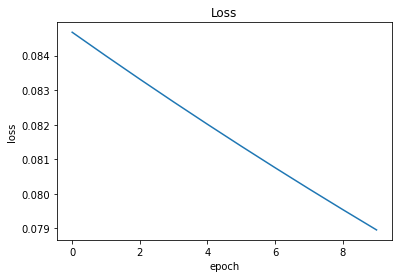

In [6]:
# ========== 损失函数可视化 ==========

plt.plot(cost)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title('Loss')
plt.show()

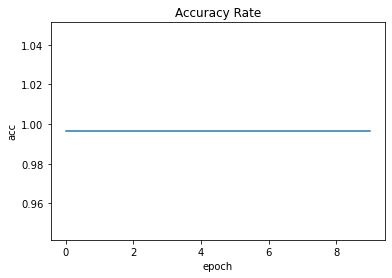

In [7]:
# ========== 准确率可视化 ==========

plt.plot(acc_re)
plt.ylabel("acc")
plt.xlabel("epoch")
plt.title('Accuracy Rate')
plt.show()

In [8]:
# ========== 提取出w0、w1和b ==========

#loss = torch.nn.BCEWithLogitsLoss()

w0 = w[0][0].detach().numpy()
w1 = w[1][0].detach().numpy()
b = b[0][0].detach().numpy()
print(w0,' ',w1,' ',b)

-0.49539638   -1.079424   -0.23379363


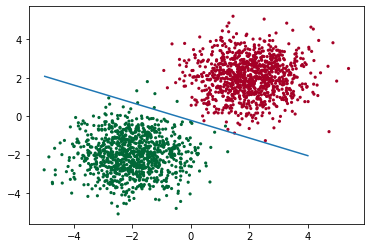

In [9]:
# ========== 结果可视化 ==========

plot_x = np.arange(-5, 5, 1)
plot_y = (-w0 * plot_x - b) / w1
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=10, lw=0,cmap='RdYlGn')
plt.plot(plot_x, plot_y)
plt.show()